### 数据预处理

In [16]:
import csv
import pandas as pd
import numpy as np
import json

In [17]:
data = pd.read_csv('data.csv')

In [18]:
data.head()

,high0,high1,high2,high3,high4,high5,high6,high7,high8,high9,...,low694,low695,low696,low697,low698,low699,y1,y2,y3,y4
0,0.359752,0.424275,-0.681706,0.433839,0.004776,0.001909,0.004776,0.001909,97.547158,48.476906,...,147867.681361,34273.003529,147552.433395,33959.200637,39.083400,10.692026,2,1,0,6
1,0.374953,0.477638,-0.666732,0.429372,0.010201,0.002640,0.010201,0.002640,94.752225,45.264284,...,0.000000,0.000000,0.000000,0.000000,9.121715,3.024193,2,1,0,6
2,0.374791,0.433773,-0.650851,0.302914,0.027013,0.007587,0.027013,0.007587,103.646422,66.342239,...,309465.762848,70251.212387,86736.061773,19023.865616,272.618048,39.410815,0,1,0,4
3,0.425997,0.407457,-0.651442,0.335262,0.018433,0.004401,0.018433,0.004401,107.650662,116.364404,...,34427.765392,8119.821369,0.000000,0.000000,243362.224842,54139.263203,2,1,0,4
4,0.462599,0.428727,-0.676588,0.425349,0.004667,0.002822,0.004667,0.002822,104.963457,19.671929,...,516165.111104,112837.709221,355822.121392,80991.490121,142600.840444,31689.816294,0,1,0,4


选择 High-level features

In [19]:
X = data.drop(['y1','y2','y3','y4'],axis=1)
X = X.iloc[:,746:]
y1 = data['y1']
y2 = data['y2']
y3 = data['y3']
y4 = data['y4']
y = data[['y1','y2','y3','y4']]

In [20]:
X.head()

,low0,low1,low2,low3,low4,low5,low6,low7,low8,low9,...,low690,low691,low692,low693,low694,low695,low696,low697,low698,low699
0,-0.404587,-0.027523,-0.004128,0.000271,-0.000807,0.000931,0.000697,0.000275,50.200287,8.327459,...,272112.252243,76047.684898,169839.362072,46701.487476,147867.681361,34273.003529,147552.433395,33959.200637,39.083400,10.692026
1,1.174664,0.379195,-0.751342,0.005092,-0.003685,0.004446,0.002609,0.002148,7.409782,8.132487,...,52893.963203,14728.068098,508166.296681,136867.615309,0.000000,0.000000,0.000000,0.000000,9.121715,3.024193
2,0.400450,0.177928,-0.158333,0.000270,0.000034,0.000423,-0.000104,0.000171,13.017520,14.181809,...,297675.765155,78163.056222,373672.168560,94835.329620,309465.762848,70251.212387,86736.061773,19023.865616,272.618048,39.410815
3,-0.577063,-0.192244,0.380528,-0.000520,-0.000550,0.000038,0.000470,-0.000244,16.128941,10.575041,...,150644.829017,40168.147290,396776.193606,104552.824689,34427.765392,8119.821369,0.000000,0.000000,243362.224842,54139.263203
4,-0.195455,0.078409,-0.501705,0.000858,-0.000832,0.000338,0.000798,0.000645,2.997044,4.929501,...,368334.318820,96758.790944,230614.666407,61553.069717,516165.111104,112837.709221,355822.121392,80991.490121,142600.840444,31689.816294


检查 nan

In [21]:
idx = np.where(np.isnan(X).any(axis=1)==True)[0]
idx

array([], dtype=int64)

In [22]:
if len(idx) != 0:
    print(f"drop {len(idx)} rows with nan value")
    for i in idx:
        X = np.delete(X, i, axis=0)
        y1 = np.delete(y1, i, axis=0)
        y2 = np.delete(y2, i, axis=0)
        y3 = np.delete(y3, i, axis=0)
        y4 = np.delete(y4, i, axis=0)
        y = np.delete(y, i, axis=0)
else:
    X = np.array(X)
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y = np.array(y)

In [23]:
X_norm = np.apply_along_axis(lambda x: x / np.linalg.norm(x), axis=0, arr=X)


In [24]:
# check nan in X_norm
np.where(np.isnan(X_norm).any(axis=1)==True)

(array([], dtype=int64),)

In [25]:
print(f"Read in videos y:{len(y1)}")

Read in videos y:3656


维度

In [26]:
print(f"X:{len(X_norm[0])}")

X:700


## Train 

In [27]:
from sklearn.model_selection import train_test_split
# frame split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(f"Video num: X_train:{len(X_train)}, X_test:{len(X_test)}, y_train:{len(y_train)}, y_test:{len(y_test)}")

y1_train, y1_test = y_train[:,0], y_test[:,0]
y2_train, y2_test = y_train[:,1], y_test[:,1]
y3_train, y3_test = y_train[:,2], y_test[:,2]
y4_train, y4_test = y_train[:,3], y_test[:,3]

Video num: X_train:2924, X_test:732, y_train:2924, y_test:732


In [28]:
y_train

array([[2, 2, 1, 2],
       [2, 1, 0, 6],
       [0, 1, 0, 4],
       ...,
       [3, 0, 0, 4],
       [2, 0, 0, 6],
       [2, 0, 0, 4]])

In [29]:
target = [["强","中","弱","没有回应（忽视）"], 
        ['中性','积极','消极'], 
        ["专注（任务中）","走神（任务外）"], 
        ["玩乐", "闲聊", "一人独立尝试一人摸鱼", "各自神游", "主导", "支持", "旁观", "冲突"]]

查看数据分布

强:873, 中:524, 弱:1506, 没有回应（忽视）:753, 


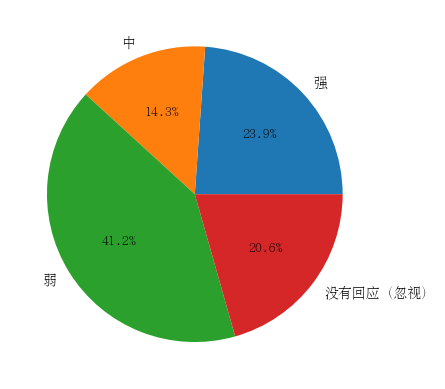

中性:2069, 积极:1076, 消极:511, 


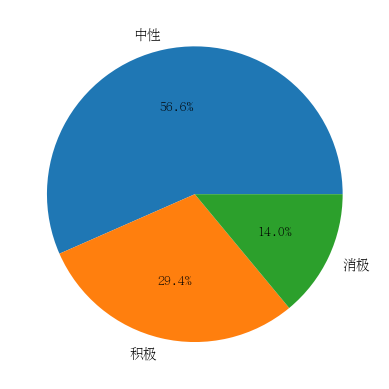

专注（任务中）:3216, 走神（任务外）:440, 


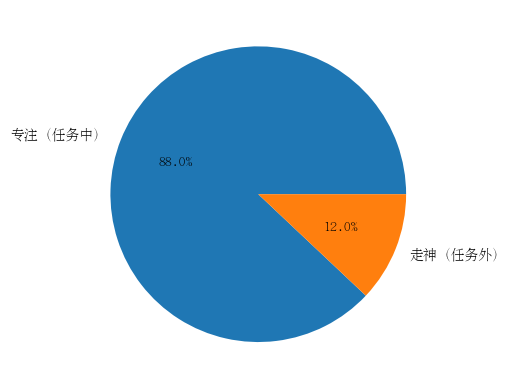

玩乐:13, 闲聊:39, 一人独立尝试一人摸鱼:372, 各自神游:20, 主导:1022, 支持:1045, 旁观:1121, 冲突:24, 


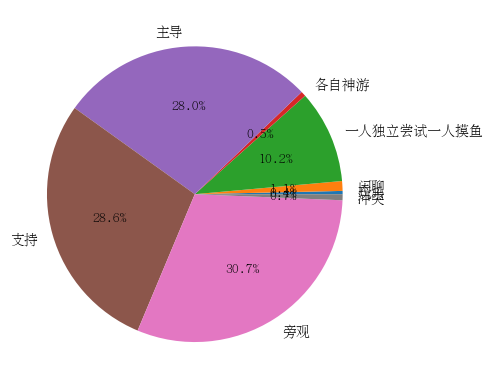

In [30]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 步骤一

plt.rcParams["font.sans-serif"]=["AR PL UMing CN"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

def num_of_cls(y, target): 
    N = []
    for i in range(len(target)):
        print(target[i] + f":{len(y[y==i])}", end=", ")
        N.append(len(y[y==i]))
    print()
    return N

for i in range(4):
    N = num_of_cls(y[:,i],target[i])
    # proportions = [ p/len(y) for p in N]
    plt.pie(N,labels=target[i],autopct='%1.1f%%')
    plt.show()


Cross-validation  
- 5 folds

In [31]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

def crossVal(rfc, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring = ['accuracy', 'f1_weighted', 'recall_weighted', 'precision_weighted']

    # 使用交叉验证器对模型进行评估
    scores = cross_validate(rfc, X, y, cv=kfold, scoring=scoring)

    # 输出交叉验证结果
    print('Accuracy:', scores['test_accuracy'].mean())
    print('F1 score:', scores['test_f1_weighted'].mean())
    print('Recall:', scores['test_recall_weighted'].mean())
    print('Precision:', scores['test_precision_weighted'].mean())

def GridSearch(estimator, param_grid, X_train, y_train, X_test, y_test, target, cv=5):
    # grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
    # grid_search = RandomizedSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
    # grid_search = HalvingGridSearchCV(estimator=estimator, param_distributions=param_grid, cv=cv)
    grid_search = HalvingRandomSearchCV(estimator=estimator,param_distributions=param_grid, cv=cv)


    grid_search.fit(X_train, y_train)

    # print(grid_search.best_params_, grid_search.best_score_)
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    y_predict = best_model.predict(X_test)
    print("Test score:", test_score)
    print("Report:")
    print(classification_report(y_test, y_predict, target_names=target, zero_division=0))
    return best_model

### Random Forest

In [32]:

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# 使用随机森林预测一个frame
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

for i in range(len(target)):
    print(f"----------------------Task {i}----------------------")
    print(classification_report(y_test[:,i], y_predict[:,i], target_names=target[i],zero_division=0))
    num_of_cls(y_predict[:,i],target[i])


----------------------Task 0----------------------
              precision    recall  f1-score   support

           强       0.47      0.23      0.31       182
           中       0.00      0.00      0.00       103
           弱       0.45      0.87      0.59       309
    没有回应（忽视）       0.49      0.15      0.23       138

    accuracy                           0.45       732
   macro avg       0.35      0.31      0.28       732
weighted avg       0.40      0.45      0.37       732

强:90, 中:0, 弱:599, 没有回应（忽视）:43, 
----------------------Task 1----------------------
              precision    recall  f1-score   support

          中性       0.58      0.98      0.73       408
          积极       0.78      0.13      0.23       211
          消极       0.00      0.00      0.00       113

    accuracy                           0.59       732
   macro avg       0.45      0.37      0.32       732
weighted avg       0.55      0.59      0.47       732

中性:696, 积极:36, 消极:0, 
----------------------Task 2

#### task 1

In [33]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, 
                            param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best cross-validation score: 0.4587467700258398
Test score: 0.46994535519125685
Report:
              precision    recall  f1-score   support

           强       0.46      0.23      0.31       182
           中       0.00      0.00      0.00       103
           弱       0.46      0.89      0.61       309
    没有回应（忽视）       0.55      0.19      0.28       138

    accuracy                           0.47       732
   macro avg       0.37      0.33      0.30       732
weighted avg       0.42      0.47      0.39       732



#### Task 2

In [34]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Best cross-validation score: 0.6093004115226337
Test score: 0.6024590163934426
Report:
              precision    recall  f1-score   support

          中性       0.59      0.95      0.73       408
          积极       0.67      0.26      0.37       211
          消极       1.00      0.01      0.02       113

    accuracy                           0.60       732
   macro avg       0.75      0.40      0.37       732
weighted avg       0.68      0.60      0.52       732



#### Task 3

In [35]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 144 is smaller than n_iter=146. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}
Best cross-validation score: 0.8776994228490617
Test score: 0.8961748633879781
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.90      1.00      0.95       654
     走神（任务外）       0.75      0.04      0.07        78

    accuracy                           0.90       732
   macro avg       0.82      0.52      0.51       732
weighted avg       0.88      0.90      0.85       732



#### Task 4

In [36]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Best cross-validation score: 0.45066275672424166
Test score: 0.4562841530054645
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         1
          闲聊       0.00      0.00      0.00         9
  一人独立尝试一人摸鱼       0.69      0.14      0.23        64
        各自神游       0.00      0.00      0.00         4
          主导       0.41      0.47      0.44       202
          支持       0.48      0.46      0.47       219
          旁观       0.46      0.57      0.51       227
          冲突       0.00      0.00      0.00         6

    accuracy                           0.46       732
   macro avg       0.26      0.21      0.21       732
weighted avg       0.46      0.46      0.44       732



### DT

In [37]:
from sklearn.tree import DecisionTreeClassifier
# 建立决策树分类器
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
for i in range(len(target)):
    print(f"----------------------Task {i}----------------------")
    print(classification_report(y_test[:,i], y_predict[:,i], target_names=target[i],zero_division=0))
    num_of_cls(y_predict[:,i],target[i])

----------------------Task 0----------------------
              precision    recall  f1-score   support

           强       0.37      0.35      0.36       182
           中       0.12      0.14      0.13       103
           弱       0.49      0.48      0.49       309
    没有回应（忽视）       0.26      0.26      0.26       138

    accuracy                           0.36       732
   macro avg       0.31      0.31      0.31       732
weighted avg       0.36      0.36      0.36       732

强:174, 中:114, 弱:305, 没有回应（忽视）:139, 
----------------------Task 1----------------------
              precision    recall  f1-score   support

          中性       0.58      0.55      0.56       408
          积极       0.33      0.38      0.36       211
          消极       0.20      0.19      0.19       113

    accuracy                           0.45       732
   macro avg       0.37      0.37      0.37       732
weighted avg       0.45      0.45      0.45       732

中性:387, 积极:242, 消极:103, 
---------------------

#### task 1

In [38]:
# GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y1_train, 
                X_test=X_test, y_test=y1_test,
                target=target[0], cv=5)

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 8, 'criterion': 'gini'}
Best cross-validation score: 0.35960809646856157
Test score: 0.4057377049180328
Report:
              precision    recall  f1-score   support

           强       0.39      0.40      0.39       182
           中       0.10      0.03      0.05       103
           弱       0.46      0.61      0.52       309
    没有回应（忽视）       0.31      0.25      0.28       138

    accuracy                           0.41       732
   macro avg       0.32      0.32      0.31       732
weighted avg       0.36      0.41      0.38       732



#### task 2

In [39]:
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y2_train, 
                X_test=X_test, y_test=y2_test,
                target=target[1], cv=5)

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'gini'}
Best cross-validation score: 0.5442611683848797
Test score: 0.5505464480874317
Report:
              precision    recall  f1-score   support

          中性       0.61      0.73      0.66       408
          积极       0.47      0.47      0.47       211
          消极       0.24      0.07      0.11       113

    accuracy                           0.55       732
   macro avg       0.44      0.42      0.41       732
weighted avg       0.51      0.55      0.52       732



#### task 3

In [40]:
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y3_train, 
                X_test=X_test, y_test=y3_test,
                target=target[2], cv=5)

Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'gini'}
Best cross-validation score: 0.8659729388831556
Test score: 0.8825136612021858
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.90      0.97      0.94       654
     走神（任务外）       0.35      0.12      0.17        78

    accuracy                           0.88       732
   macro avg       0.62      0.54      0.55       732
weighted avg       0.84      0.88      0.86       732



#### task 4

In [41]:
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y4_train, 
                X_test=X_test, y_test=y4_test,
                target=target[3], cv=5)

Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'gini'}
Best cross-validation score: 0.3580261235713672
Test score: 0.366120218579235
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         1
          闲聊       0.00      0.00      0.00         9
  一人独立尝试一人摸鱼       0.21      0.16      0.18        64
        各自神游       0.00      0.00      0.00         4
          主导       0.36      0.40      0.38       202
          支持       0.34      0.41      0.37       219
          旁观       0.44      0.39      0.41       227
          冲突       0.00      0.00      0.00         6

    accuracy                           0.37       732
   macro avg       0.17      0.17      0.17       732
weighted avg       0.36      0.37      0.36       732



### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# 建立KNN分类器
clf = KNeighborsClassifier(n_neighbors=3)

#### task 1

In [43]:
# GridSearch
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 27, 'leaf_size': 36}
Best cross-validation score: 0.3864556416881998
Test score: 0.4016393442622951
Report:
              precision    recall  f1-score   support

           强       0.32      0.21      0.26       182
           中       0.25      0.02      0.04       103
           弱       0.43      0.78      0.55       309
    没有回应（忽视）       0.32      0.08      0.13       138

    accuracy                           0.40       732
   macro avg       0.33      0.27      0.24       732
weighted avg       0.36      0.40      0.33       732



#### task 2

In [44]:
# GridSearch
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=6)

Best hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 23, 'leaf_size': 36}
Best cross-validation score: 0.5714274602972579
Test score: 0.5642076502732241
Report:
              precision    recall  f1-score   support

          中性       0.57      0.91      0.71       408
          积极       0.48      0.18      0.27       211
          消极       1.00      0.01      0.02       113

    accuracy                           0.56       732
   macro avg       0.68      0.37      0.33       732
weighted avg       0.61      0.56      0.47       732



#### task 3

In [45]:
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=10)

Best hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 26, 'leaf_size': 46}
Best cross-validation score: 0.8687521633783316
Test score: 0.8934426229508197
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.89      1.00      0.94       654
     走神（任务外）       0.00      0.00      0.00        78

    accuracy                           0.89       732
   macro avg       0.45      0.50      0.47       732
weighted avg       0.80      0.89      0.84       732



#### task 4

In [46]:
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)

Best hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 18, 'leaf_size': 39}
Best cross-validation score: 0.3733200137492481
Test score: 0.37158469945355194
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         1
          闲聊       0.00      0.00      0.00         9
  一人独立尝试一人摸鱼       0.50      0.02      0.03        64
        各自神游       0.00      0.00      0.00         4
          主导       0.35      0.33      0.34       202
          支持       0.42      0.24      0.30       219
          旁观       0.37      0.67      0.48       227
          冲突       0.00      0.00      0.00         6

    accuracy                           0.37       732
   macro avg       0.20      0.16      0.14       732
weighted avg       0.38      0.37      0.33       732



### SVM
结果很差 看warning原因应该是有一些结果直接没有分类  
看看是否需要调参数或者直接去掉 

In [47]:
from sklearn.svm import SVC
clf = SVC()

#### task 1

In [48]:
# GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
Best cross-validation score: 0.4049569336778639
Test score: 0.41530054644808745
Report:
              precision    recall  f1-score   support

           强       0.27      0.02      0.04       182
           中       0.00      0.00      0.00       103
           弱       0.43      0.95      0.59       309
    没有回应（忽视）       0.21      0.04      0.06       138

    accuracy                           0.42       732
   macro avg       0.23      0.25      0.17       732
weighted avg       0.29      0.42      0.27       732



#### task 2

In [49]:
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

Best hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 1}
Best cross-validation score: 0.5648406940732256
Test score: 0.5546448087431693
Report:
              precision    recall  f1-score   support

          中性       0.56      0.99      0.71       408
          积极       0.25      0.00      0.01       211
          消极       0.00      0.00      0.00       113

    accuracy                           0.55       732
   macro avg       0.27      0.33      0.24       732
weighted avg       0.38      0.55      0.40       732



#### task 3

In [50]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)

Best hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 1}
Best cross-validation score: 0.8795570079883805
Test score: 0.8934426229508197
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.89      1.00      0.94       654
     走神（任务外）       0.00      0.00      0.00        78

    accuracy                           0.89       732
   macro avg       0.45      0.50      0.47       732
weighted avg       0.80      0.89      0.84       732



#### task 4

In [51]:
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)

Best hyperparameters: {'kernel': 'poly', 'gamma': 'auto', 'C': 10}
Best cross-validation score: 0.3061570851594053
Test score: 0.31010928961748635
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         1
          闲聊       0.00      0.00      0.00         9
  一人独立尝试一人摸鱼       0.00      0.00      0.00        64
        各自神游       0.00      0.00      0.00         4
          主导       0.00      0.00      0.00       202
          支持       0.00      0.00      0.00       219
          旁观       0.31      1.00      0.47       227
          冲突       0.00      0.00      0.00         6

    accuracy                           0.31       732
   macro avg       0.04      0.12      0.06       732
weighted avg       0.10      0.31      0.15       732



### XGBoost

In [41]:
import xgboost as xgb


# 定义模型参数
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': 'mlogloss'
}

# 将数据转换为DMatrix格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 训练模型
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上预测
y_pred = model.predict(dtest)

# 计算准确率
accuracy = sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred, target_names=["强","中","弱","没有回应（忽视）"]))


XGBoostError: [17:30:27] ../include/xgboost/objective.h:98: multioutput is not supported by current objective function
Stack trace:
  [bt] (0) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2d1853) [0x7fe0b76d1853]
  [bt] (1) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2df66c) [0x7fe0b76df66c]
  [bt] (2) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2df8cd) [0x7fe0b76df8cd]
  [bt] (3) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2ec087) [0x7fe0b76ec087]
  [bt] (4) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2e02f8) [0x7fe0b76e02f8]
  [bt] (5) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7fe0b753c5f0]
  [bt] (6) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/lib-dynload/../../libffi.so.8(+0xa052) [0x7fe148cec052]
  [bt] (7) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/lib-dynload/../../libffi.so.8(+0x88cd) [0x7fe148cea8cd]
  [bt] (8) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x2fe) [0x7fe148d01d6e]



In [52]:
from xgboost import XGBClassifier
# 使用随机森林预测一个frame
xgb = XGBClassifier(n_estimators=1000, random_state=42)

xgb.fit(X_train, y4_train)

# 在测试集上预测
y_predict = xgb.predict(X_test)


print(classification_report(y4_test, y_predict, target_names=target[3],zero_division=0))
num_of_cls(y_predict,target[3])

              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         1
          闲聊       0.00      0.00      0.00         9
  一人独立尝试一人摸鱼       0.33      0.20      0.25        64
        各自神游       0.00      0.00      0.00         4
          主导       0.42      0.49      0.46       202
          支持       0.49      0.47      0.48       219
          旁观       0.52      0.57      0.54       227
          冲突       0.00      0.00      0.00         6

    accuracy                           0.47       732
   macro avg       0.22      0.22      0.22       732
weighted avg       0.45      0.47      0.46       732

玩乐:0, 闲聊:1, 一人独立尝试一人摸鱼:39, 各自神游:1, 主导:233, 支持:208, 旁观:250, 冲突:0, 


[0, 1, 39, 1, 233, 208, 250, 0]

In [53]:
from xgboost import XGBClassifier
# 定义xgboost分类器模型
xgb = XGBClassifier(n_estimators=100, random_state=42)

#### task 1

In [54]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier(n_estimators=100, random_state=42)
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}
Best cross-validation score: 0.45969422911283375
Test score: 0.4713114754098361
Report:
              precision    recall  f1-score   support

           强       0.46      0.37      0.41       182
           中       0.00      0.00      0.00       103
           弱       0.50      0.75      0.60       309
    没有回应（忽视）       0.39      0.34      0.37       138

    accuracy                           0.47       732
   macro avg       0.34      0.36      0.34       732
weighted avg       0.40      0.47      0.42       732



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### task 2

In [55]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.7}
Best cross-validation score: 0.6381290568919434
Test score: 0.6229508196721312
Report:
              precision    recall  f1-score   support

          中性       0.61      0.93      0.74       408
          积极       0.68      0.36      0.47       211
          消极       0.75      0.03      0.05       113

    accuracy                           0.62       732
   macro avg       0.68      0.44      0.42       732
weighted avg       0.65      0.62      0.55       732



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### task 3

In [56]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best cross-validation score: 0.8888124450559951
Test score: 0.9043715846994536
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.90      1.00      0.95       654
     走神（任务外）       0.90      0.12      0.20        78

    accuracy                           0.90       732
   macro avg       0.90      0.56      0.58       732
weighted avg       0.90      0.90      0.87       732



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### task 4

In [58]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=8)

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
154 fits failed out of a total of 176.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(


Best hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best cross-validation score: 0.4293657731157731
Test score: 0.4521857923497268
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         1
          闲聊       0.00      0.00      0.00         9
  一人独立尝试一人摸鱼       0.41      0.22      0.29        64
        各自神游       0.00      0.00      0.00         4
          主导       0.41      0.48      0.44       202
          支持       0.46      0.42      0.44       219
          旁观       0.50      0.56      0.53       227
          冲突       0.00      0.00      0.00         6

    accuracy                           0.45       732
   macro avg       0.22      0.21      0.21       732
weighted avg       0.44      0.45      0.44       732



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### LSTM  
not working so far

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=8)

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
154 fits failed out of a total of 176.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(


In [77]:
from torch import nn
import torch

class LSTM(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(100, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 4) # 4 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x) # 1 * 100
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out
        
class mil_regression(nn.Module):
    def __init__(self, input_size=786, hidden_size=100, num_layers=1, output_size=1):
        ''' use LSTM for MIL '''
        super(mil_regression, self).__init__()
        self.net = LSTM(input_size, hidden_size, num_layers)
        self.class_num = output_size

    def forward(self, inputs):
        # input shape: (frame_num, feature_size)
        

        self.seg_num, self.feature_num = inputs.shape #

        # outputs = torch.zeros((self.seg_num, self.class_num)).double.cuda() #  frame * 4（bool）

        outputs = self.net(inputs)
        # for i in range(self.seg_num):
        #     outputs[i,:] = self.net(inputs[i]) # 786

        # for idx, seg in enumerate(inputs):
        #     seg = Variable(seg).cuda()
        #     outputs[idx] = self.net(seg)

        # 视频特征 = frame取平均
        output = torch.mean(outputs, 1).cuda()
        return output

In [ ]:
import torch 

model = mil_regression().cuda()

epochs = 150
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for i in range(len(X_train)): # 每次处理一个视频(对batch)

        x = torch.tensor(X_train[i]).float().cuda()
        y = torch.tensor(y_train[i]).float().cuda()
        

        if len(x.shape) ==1:
            continue

        optimizer.zero_grad()
        
        y_pred = model(x)

        single_loss = loss_function(y_pred, y)
        single_loss.backward()
        optimizer.step()
        
        # if (i+1) % 10 == 0:
        #     print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, len(X_train), single_loss.item()))

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
with torch.no_grad():
    
    correct = 0
    total = 0
    for i in range(len(X_test)): # 每次处理一个视频(对batch)
        x = torch.tensor(X_test[i]).float().cuda()
        y = torch.tensor(y_test[i]).float().cuda()
        print(y)

        if len(x.shape) ==1:
            continue

        outputs = model(x)
        print(outputs)
        correct += (outputs == y)

### testing

In [10]:
import numpy as np

# 创建一个二维矩阵
x = np.array([[1, 2, 3], [4, 5, 6], [5, 8, 100],[5, 8, 100]])

# 计算梯度
dy = np.gradient(x)

# 输出结果
print(dy)


[array([[ 3. ,  3. ,  3. ],
       [ 2. ,  3. , 48.5],
       [ 0.5,  1.5, 47. ],
       [ 0. ,  0. ,  0. ]]), array([[ 1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ],
       [ 3. , 47.5, 92. ],
       [ 3. , 47.5, 92. ]])]


In [9]:
import numpy as np

# 创建一个二维数组
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 计算每一行相邻行之间的二阶导数
d2x = []
for i in range(1, x.shape[0]-1):
    dx1 = np.gradient(x[i-1, :])
    dx2 = np.gradient(x[i, :])
    dx3 = np.gradient(x[i+1, :])
    d2x.append(np.diff(dx2-dx1) / np.diff(dx3-dx2))

# 输出结果
print(d2x)


[array([nan, nan])]


/tmp/ipykernel_162420/1742590338.py:12: RuntimeWarning: invalid value encountered in divide
  d2x.append(np.diff(dx2-dx1) / np.diff(dx3-dx2))


In [11]:
import numpy as np

# 创建一个二维数组
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 计算每一行数据对上一行数据的导数
dx = []
for i in range(1, x.shape[0]):
    diff = np.diff(x[i, :]) / np.diff(x[i-1, :])
    dx.append(diff)

# 输出结果
print(dx)


[array([1., 1.]), array([1., 1.])]


In [37]:
import pandas as pd

# 假设df是一个DataFrame对象，其中包含frame和feature两列
df = pd.DataFrame({'frame': [1, 3], 'feature': [1, 5]})

# 将df的索引设置为frame列，并增加需要插值的索引值
df = df.set_index('frame').reindex(range(df['frame'].min(), df['frame'].max()+1))

# 对df进行插值
df_interpolated = df.interpolate().reset_index()

# 输出插值结果
print(df_interpolated)


   frame  feature
0      1      1.0
1      2      3.0
2      3      5.0
